# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

❓ Can you summarize what each metric measures in one sentence?

❓ What data / or type of data do you need for each metric ? 

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [2]:

df = pd.read_csv('db_customers.csv')
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features should be formated in datetime ? 
Convert them

In [3]:
#Recence 
from datetime import datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)

In [4]:
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)

❓ Which features are Categorical ? List the unique values on these features.

In [5]:
df['product_category_name_english'].value_counts()

bed_bath_table               10150
health_beauty                 9174
sports_leisure                8051
computers_accessories         6973
furniture_decor               6856
                             ...  
arts_and_craftmanship           23
la_cuisine                      15
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

❓ Check for missing values. What do you notice ? 


In [39]:
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [40]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ What are the proportions of each `order_status` ? 

In [243]:
df['order_status'].value_counts(normalize=True)*100

delivered      97.003312
shipped         1.119725
canceled        0.634827
unavailable     0.617747
invoiced        0.313143
processing      0.304603
created         0.004745
approved        0.001898
Name: order_status, dtype: float64

❓ Which `order_status` do you think should be removed from the analysis

❓ What feature would you choose in the e-commerce dataset provided? 

In [6]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

❓ What method would you use to group the data? 

❓ What feature would you use to group the data? 

In [70]:
df['customer_unique_id'].value_counts()

9a736b248f67d166d2fbb006bcb877c3    54
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
1d2435aa3b858d45c707c9fc25e18779    24
90807fdb59eec2152bc977feeb6e47e7    24
                                    ..
feeb3c8abc9b9f2566108e37cf124b3c     1
06c211500493e0aa2c584346c15a1d81     1
0faaf37c3308c120fd273845719604e7     1
37299efb180b2176b103d313774e5fd6     1
bb030256ed593a7a0cca3feb2c77af9d     1
Name: customer_unique_id, Length: 94399, dtype: int64

In [176]:
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

In [7]:
df_RFM = df[['customer_unique_id','order_id', 'order_purchase_timestamp','payment_value']]

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [77]:
df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [78]:
df['order_purchase_timestamp'].max()

Timestamp('2018-09-03 09:06:57')

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [8]:
from datetime import datetime, timedelta
recens_date = df['order_purchase_timestamp'].max() + timedelta(days=1)
# groupby for the recency 
recency_df = df.groupby(['customer_unique_id'],as_index=False)['order_purchase_timestamp'].max()
recency_df.columns = ['customer_unique_id','LastPurchaseDate']
# add columns recency
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (recens_date - x).days)
recency_df

,customer_unique_id,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293
...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452
94395,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267
94396,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573
94397,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124


In [9]:
recency_df = recency_df.drop('LastPurchaseDate', axis=1)

Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

In [102]:
dfAgg=df_RFM.groupby(['customer_unique_id']).agg(Montant=pd.NamedAgg(column='payment_value', aggfunc=sum), Fréquence=pd.NamedAgg(column='payment_value', aggfunc='count'),Paniermoy=pd.NamedAgg(column='payment_value', aggfunc='mean')).reset_index()

In [103]:
dfAgg = dfAgg.drop('Paniermoy', axis=1)

In [156]:
RFM = recency_df.merge(dfAgg, how = 'left', left_on='customer_unique_id', right_on='customer_unique_id')

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [157]:
RFM

,customer_unique_id,Recency,Montant,Fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1
2,0000f46a3911fa3c0805444483337064,542,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,2067.42,1
94395,fffea47cd6d3cc0a88bd621562a9d061,267,84.58,1
94396,ffff371b4d645b6ecea244b27531430a,573,112.46,1
94397,ffff5962728ec6157033ef9805bacc48,124,133.69,1


Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [158]:
RFM.describe()

,Recency,Montant,Fréquence
count,94399.000000,94399.000000,94399.000000
mean,242.864162,168.250134,1.095393
std,152.723176,232.880460,0.530316
min,1.000000,0.000000,0.000000
25%,119.000000,63.110000,1.000000
50%,224.000000,108.100000,1.000000
75%,352.000000,184.590000,1.000000
max,729.000000,13664.080000,54.000000


Now that you have clusters for each category, explain the different buying behaviors

In [163]:
def m_score (x):
    if x <= RFM['Montant'][200]:
        return 3
    elif x <= RFM['Montant'][100]:
        return 2
    else:
        return 1
RFM['M'] = RFM['Montant'].apply(lambda x: m_score(x))

In [164]:
RFM["R"] = [2 if x > 270  else 1 for x in RFM['Recency']]
RFM["F"] = [2 if x > 1  else 1 for x in RFM['Fréquence']]
#RFM["M"] = [2 if x > 270 else 1 for x in RFM['Montant']]
RFM.head()

,customer_unique_id,Recency,Montant,Fréquence,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,1,1,1,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,1,1,3,111
2,0000f46a3911fa3c0805444483337064,542,86.22,1,2,1,1,211
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,2,1,3,211
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,2,1,1,211


In [165]:
RFM['RFM Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM.head()

,customer_unique_id,Recency,Montant,Fréquence,R,F,M,RFM Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,1,1,1,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,1,1,3,113
2,0000f46a3911fa3c0805444483337064,542,86.22,1,2,1,1,211
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,2,1,3,213
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,2,1,1,211


In [166]:
RFM['RFM Score'].value_counts(ascending=True)

223      375
123      441
221     2221
121     3247
213     9728
113    14160
211    26072
111    38155
Name: RFM Score, dtype: int64

In [177]:
def categ(x):
    if x in["111", "112"]:
        return "Lost"
    elif x in["221", "222", "223"]:
         return "Fidèle"
    elif x in[ "113", "123", ]:
        return "Premium"
    else:
        return "Lambda"

In [178]:
RFM['Statut'] = RFM['RFM Score'].apply(categ)

In [179]:
RFM['Statut'].value_counts(normalize=True)*100

Lambda     41.363786
Lost       40.418860
Premium    15.467325
Fidèle      2.750029
Name: Statut, dtype: float64

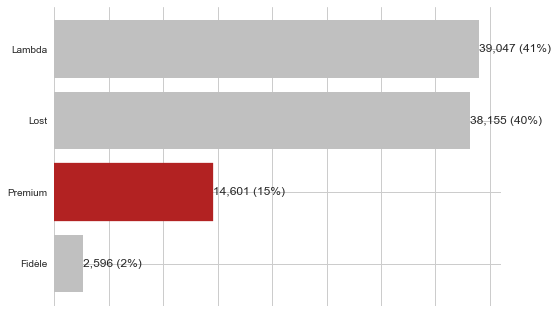

In [180]:
# count the number of customers in each segment
categ_counts = RFM['Statut'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Premium']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

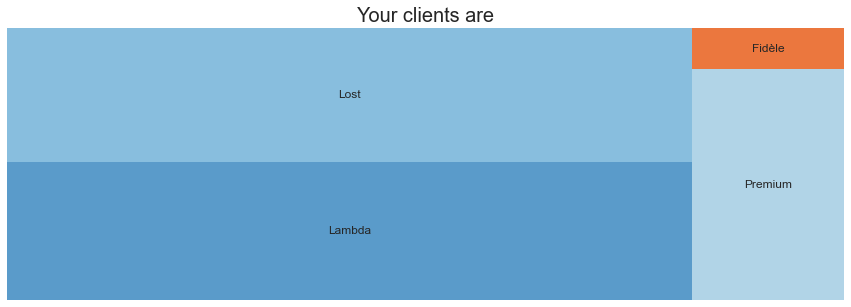

In [186]:
# visualisation squarify
y = RFM['Statut'].value_counts()
plt.rcParams['figure.figsize'] = (15, 5)
color = plt.cm.tab20c(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Your clients are', fontsize = 20)
plt.axis('off')
plt.show()

# Working with cohorts

❓What is a cohort? 

❓Why is it interesting to analyse cohorts ? 

❓What data (already existing in the original dataset) do we need to build a cohort? 

Build a new df with just these 3 features

In [224]:
df_cohort = df[['customer_unique_id','order_id', 'order_purchase_timestamp' ]]
df_cohort

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
3,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
4,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
...,...,...,...
105378,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05
105379,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58
105380,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43
105381,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [227]:
df_cohort['order_time_month'] = df_cohort['order_purchase_timestamp'].dt.to_period("M")

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [229]:
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_cohort.groupby('customer_unique_id').size()[df_cohort.groupby('customer_unique_id').size() > 1])
df_cohort = df_cohort.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_cohort = df_cohort[df_cohort['na'].notna()]

In [230]:
df_cohort['cohort'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_cohort

,customer_unique_id,order_id,order_purchase_timestamp,order_time_month,na,cohort
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10,4.0,2017-09
11,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0,2017-07
12,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,2017-07,2.0,2017-07
...,...,...,...,...,...,...
105367,9e4accf95024aa6565ca1efcadb96752,19dba6d1e58b04e7fc820558a38ea398,2018-05-12 13:42:24,2018-05,2.0,2017-09
105373,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0,2017-10
105374,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,2017-10-04 19:57:37,2017-10,2.0,2017-10
105375,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,2017-01-27 00:30:03,2017-01,2.0,2017-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [231]:
df_cohort = df_cohort.groupby(['cohort', 'order_time_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)

Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [233]:
from operator import attrgetter
df_cohort['period_number'] = (df_cohort.order_time_month - df_cohort.cohort).apply(attrgetter('n'))

Explore a cohort (for example 2017-01) and try to understand what it shows

In [235]:
df_cohort

,cohort,order_time_month,n_customers,period_number
0,2016-10,2016-10,25,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13
...,...,...,...,...
217,2018-07,2018-08,44,1
218,2018-07,2018-09,2,2
219,2018-08,2018-08,246,0
220,2018-08,2018-09,7,1


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [236]:
cohort_piv = df_cohort.pivot_table(index = 'cohort', columns='period_number', values= 'n_customers' )

In [237]:
cohort_piv

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,25.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,81.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,143.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,229.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,215.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,354.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,285.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,365.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [238]:
cohort_size = cohort_piv.iloc[:,0]
retention_matrix = cohort_piv.divide(cohort_size, axis = 0)

Plot your `retention matrix` using the code below : 

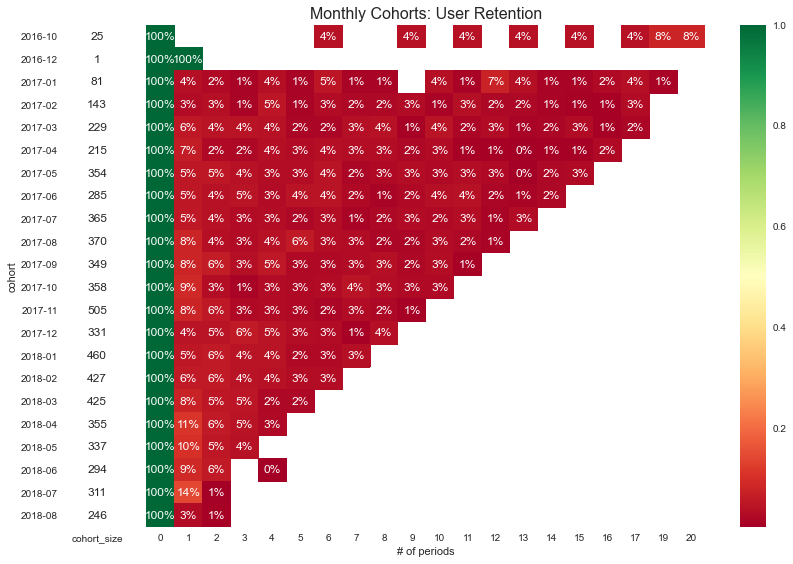

In [239]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

Here is the code for the analysis of customers who have bought more than once : 

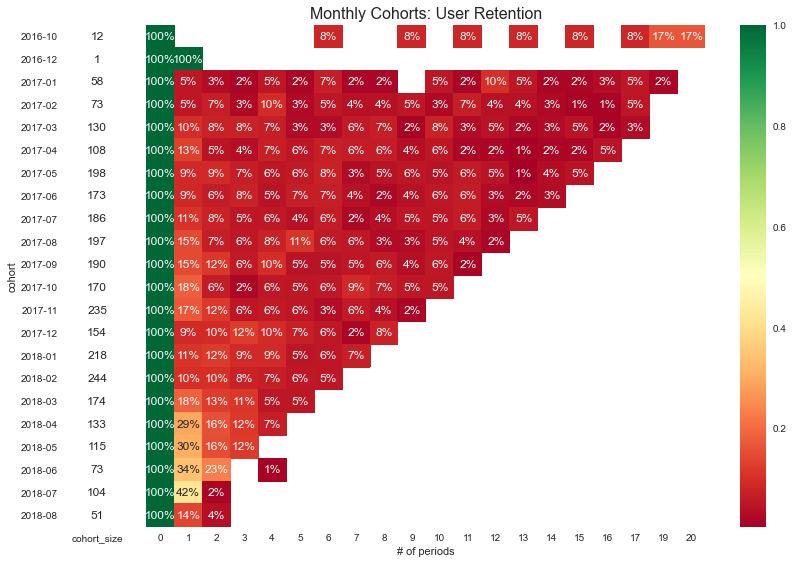

In [241]:
#start from your df created doing the RFM segmentation
df_cohort = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_cohort['order_month'] = df_cohort['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_cohort.groupby('customer_unique_id').size()[
                       df_cohort.groupby('customer_unique_id').size() > 1])

df_cohort = df_cohort.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_cohort = df_cohort[df_cohort['na'].notna()]
df_cohort['cohort'] = df_cohort.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_cohort.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()